## Comparing air-sea flux for the BR3, PI5-7 runs...

Paper figure 3 - air-sea flux

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script> so much code! click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
import numpy as np
# import xarray as xr
import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
# from scipy.io import loadmat
from cmocean import cm
import glob
import pandas as pd
import warnings
import pickle
import arrow
#from cartopy import crs, feature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools
import netCDF4 as nc

#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

In [6]:
# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_summer1 = np.zeros([dayslen,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%20 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
# #     print(tn['co2_flux_mmol_m2_s'])
#     t_dic = tn['co2_flux_mmol_m2_s'][0,:,:]
#     BR_oma_summer1[i,:,:] = t_dic


# print(np.shape(BR_oma_summer1))
# #BR_oma_summer_mean = np.nanmean(BR_oma_summer1,axis=0)
# pickle.dump(BR_oma_summer1, open("./pkls/BR3_flx.pkl", 'wb'))

In [ ]:
# BR_oma_summer1 = np.zeros([dayslen,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%20 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/PI5/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
# #     print(tn['co2_flux_mmol_m2_s'])
#     t_dic = tn['co2_flux_mmol_m2_s'][0,:,:]
#     BR_oma_summer1[i,:,:] = t_dic


# print(np.shape(BR_oma_summer1))
# pickle.dump(BR_oma_summer1, open("./pkls/PI5_flx.pkl", 'wb'))

In [ ]:
# BR_oma_summer1 = np.zeros([dayslen,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%20 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/PI6/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
# #     print(tn['co2_flux_mmol_m2_s'])
#     t_dic = tn['co2_flux_mmol_m2_s'][0,:,:]
#     BR_oma_summer1[i,:,:] = t_dic


# print(np.shape(BR_oma_summer1))
# pickle.dump(BR_oma_summer1, open("./pkls/PI6_flx.pkl", 'wb'))

In [ ]:
# BR_oma_summer1 = np.zeros([dayslen,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%20 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/PI7/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
# #     print(tn['co2_flux_mmol_m2_s'])
#     t_dic = tn['co2_flux_mmol_m2_s'][0,:,:]
#     BR_oma_summer1[i,:,:] = t_dic


# print(np.shape(BR_oma_summer1))
# pickle.dump(BR_oma_summer1, open("./pkls/PI7_flx.pkl", 'wb'))

## Load flux calculations and convert from mmol/m2/s to mmol/day and g/yr

In [12]:
BR_flx = pickle.load(open('./pkls/BR3_flx.pkl', 'rb')) * 1.11 #asselin filter
BR_flx[BR_flx>1e5]=np.nan
print(np.shape(BR_flx))

#mmol/m2/s > mmol/m2/day
BR_flx_mmol_m2_day = BR_flx * 86400
print(np.shape(BR_flx_mmol_m2_day))
BR3_daily_mean_mmol_m2_day = np.zeros(365)

for i in range(0,365):
    BR3_daily_mean_mmol_m2_day[i] = np.nanmean(BR_flx_mmol_m2_day[i,:,:])

BR_flx_mmol_m2_yr = np.sum(BR_flx_mmol_m2_day, axis = 0)
#mmol/yr to g/yr 12.0107 g/mol /1000 for mmol
BR_flx_gC_m2_yr = BR_flx_mmol_m2_yr*12.0107*1e-3
BR_flx_gC_m2_yr[BR_flx_gC_m2_yr>1e6]=np.nan
BR_flx_gC_m2_yr[BR_flx_gC_m2_yr==0]=np.nan
print('mean BR flux g/m2/yr')
print(np.nanmean(BR_flx_gC_m2_yr))

#####
PI7_flx = pickle.load(open('./pkls/PI7_flx.pkl', 'rb')) * 1.11 #asselin filter
PI7_flx[PI7_flx>1e4]=np.nan
PI7_flx[PI7_flx<-1e4]=np.nan

#mmol/m2/s > mmol/m2/day
PI7_flx_mmol_m2_day = PI7_flx * 86400
PI7_daily_mean_mmol_m2_day = np.zeros(365)

for i in range(0,365):
    PI7_daily_mean_mmol_m2_day[i] = np.nanmean(PI7_flx_mmol_m2_day[i,:,:])

PI7_flx_mmol_m2_yr = np.sum(PI7_flx_mmol_m2_day, axis = 0)
#mmol/yr to g/yr 12.0107 g/mol /1000 for mmol
PI7_flx_gC_m2_yr = PI7_flx_mmol_m2_yr*12.0107*1e-3
PI7_flx_gC_m2_yr[PI7_flx_gC_m2_yr>1e6]=np.nan
PI7_flx_gC_m2_yr[PI7_flx_gC_m2_yr==0]=np.nan
print('mean PI7 flux g/m2/yr')
print(np.nanmean(PI7_flx_gC_m2_yr))


PI6_flx = pickle.load(open('./pkls/PI6_flx.pkl', 'rb')) * 1.11 #asselin filter
PI6_flx[PI6_flx>1e4]=np.nan
PI6_flx[PI6_flx<-1e4]=np.nan

#mmol/m2/s > mmol/m2/day
PI6_flx_mmol_m2_day = PI6_flx * 86400
PI6_daily_mean_mmol_m2_day = np.zeros(365)

for i in range(0,365):
    PI6_daily_mean_mmol_m2_day[i] = np.nanmean(PI6_flx_mmol_m2_day[i,:,:])

PI6_flx_mmol_m2_yr = np.sum(PI6_flx_mmol_m2_day, axis = 0)
#mmol/yr to g/yr 12.0107 g/mol /1000 for mmol
PI6_flx_gC_m2_yr = PI6_flx_mmol_m2_yr*12.0107*1e-3
PI6_flx_gC_m2_yr[PI6_flx_gC_m2_yr>1e6]=np.nan
PI6_flx_gC_m2_yr[PI6_flx_gC_m2_yr==0]=np.nan
print('mean PI6 flux g/m2/yr')
print(np.nanmean(PI6_flx_gC_m2_yr))

#####
PI5_flx = pickle.load(open('./pkls/PI5_flx.pkl', 'rb')) * 1.11 #asselin filter
PI5_flx[PI5_flx>1e4]=np.nan
PI5_flx[PI5_flx<-1e4]=np.nan

#mmol/m2/s > mmol/m2/day
PI5_flx_mmol_m2_day = PI5_flx * 86400
PI5_daily_mean_mmol_m2_day = np.zeros(365)

for i in range(0,365):
    PI5_daily_mean_mmol_m2_day[i] = np.nanmean(PI5_flx_mmol_m2_day[i,:,:])

PI5_flx_mmol_m2_yr = np.sum(PI5_flx_mmol_m2_day, axis = 0)
#mmol/yr to g/yr 12.0107 g/mol /1000 for mmol
PI5_flx_gC_m2_yr = PI5_flx_mmol_m2_yr*12.0107*1e-3
PI5_flx_gC_m2_yr[PI5_flx_gC_m2_yr>1e6]=np.nan
PI5_flx_gC_m2_yr[PI5_flx_gC_m2_yr==0]=np.nan
print('mean PI5 flux g/m2/yr')
print(np.nanmean(PI5_flx_gC_m2_yr))




(365, 898, 398)
(365, 898, 398)
mean BR flux g/m2/yr
-8.199290057761285
mean PI7 flux g/m2/yr
-11.369884685891053
mean PI6 flux g/m2/yr
-9.407065733262044
mean PI5 flux g/m2/yr
-6.048057726577019


In [60]:
tsal = pickle.load(open('../pkls/BR3_sal_summer_mean.pkl', 'rb'))
print(np.shape(tsal))
surfsal = tsal[0,:,:]
print(np.size(tsal == 0))
lmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
tmask = (lmask['tmask'][0,0,:,:])
w = np.where((surfsal < 2) & (tmask == 1))
print(np.size(w))
print(np.nanmean(BR_flx_gC_m2_yr[w]))

(40, 898, 398)
14296160
1818
-66.28897879825332


## calculate mean pco2 for PI5 run and BR3 run

In [13]:
# for i in range(0,898):
#     for j in range(0,398):
#         if np.ma.is_masked(tbath[i,j]):
#             w[i,j] = np.nan

            
start ='2015-01-01'
end ='2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array1 = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array1.append(r)
dayslen = len(arrow_array1)

pco2_daily_mean_BR3 = np.zeros(dayslen)
pco2_daily_mean_PI7 = np.zeros(dayslen)
pco2_daily_mean_PI6 = np.zeros(dayslen)
pco2_daily_mean_PI5 = np.zeros(dayslen)
wind_daily_mean = np.zeros(dayslen)

for i in range(0,dayslen):

    tdate = arrow_array1[i][0]
    ymd = tdate.format('YYYYMMDD')

    if i%100 == 0:
        print(ymd)
    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_'+ymd+'.nc')
    pco2 = t_pco2['model_output']['pCO2'][:]
    pco2[pco2>1e4]= np.nan
    pco2_daily_mean_BR3[i] = np.nanmean(pco2)

    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI7_OmA_plus_'+ymd+'.nc')
    pco2 = t_pco2['model_output']['pCO2'][:]
    pco2[pco2>1e4]= np.nan
    pco2_daily_mean_PI7[i] = np.nanmean(pco2)
    
    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI6_OmA_plus_'+ymd+'.nc')
    pco2 = t_pco2['model_output']['pCO2'][:]
    pco2[pco2>1e4]= np.nan
    pco2_daily_mean_PI6[i] = np.nanmean(pco2)
    
    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI5_OmA_plus_'+ymd+'.nc')
    pco2 = t_pco2['model_output']['pCO2'][:]
    pco2[pco2>1e4]= np.nan
    pco2_daily_mean_PI5[i] = np.nanmean(pco2)
    
    #wind
    t_wind = nc.Dataset('//data/tjarniko/results/hindcast.201905_windmag_interp/windmag_interp_1d_'+ymd+'.nc')
    wind = t_wind['model_output']['wind_mag'][:]
    wind[wind>1e4]= np.nan
    wind_daily_mean[i] = np.nanmean(wind)

20150101
20150411
20150720
20151028


#### get mean over-water windspeed squared

In [9]:
#brute force mask for wsquared
bathy = nc.Dataset('/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
landmask = (np.where(np.ma.is_masked(bathy['Bathymetry'][:])))
tbath = bathy['Bathymetry'][:]
w = np.zeros([898,398])


for i in range(0,898):
    for j in range(0,398):
        if np.ma.is_masked(tbath[i,j]):
            w[i,j] = np.nan

#calculate square of windspeed
start ='2015-01-01'
end ='2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array1 = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array1.append(r)
dayslen = len(arrow_array1)

wind_daily_mean_squared = np.zeros(dayslen)

for i in range(0,dayslen):

    tdate = arrow_array1[i][0]
    ymd = tdate.format('YYYYMMDD')

    if i%100 == 0:
        print(ymd)

    #wind
    t_wind = nc.Dataset('//data/tjarniko/results/hindcast.201905_windmag_interp/windmag_interp_1d_'+ymd+'.nc')
    wind = t_wind['model_output']['wind_mag'][:]
    windsqrd = wind**2
    windsqrd[np.isnan(w)] = np.nan 
    wind_daily_mean_squared[i] = (np.nanmean(windsqrd))

    

20150101
20150411
20150720
20151028


#### extract the atmospheric seasonal cycle for BR and PI

In [14]:
start ='2015-01-01'
end ='2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

dayslen = len(arrow_array)
atcco2_array = np.zeros(dayslen)
dec_time_array = np.zeros(dayslen)


#constants from SKOG for BR run

LR_slope   =  2.149     #  linear regression + gaussian fit
LR_int     =  -3929.359 #  to seasonal cycle of atmospheric co2
ctr        =  161.898   #  based on scripps observations at ptbarrow and lajolla
amp        =  7.083     #  calc notebook by TJSJ
wid        =  44.703    #  notebook loc:
ctr2       =  218.832   #  carbon_dev/MOCSY_and_FLUX/CO2_obs.ipynb
amp2       =  -19.004   #
wid2       =  87.8836   #
ctr3       =  199.430   #
amp3       =  8.026     #
wid3       =  -185.920  #

zz_LRslop = LR_slope
zz_LRint = LR_int
zz_ctr = ctr
zz_ctr2 = ctr2
zz_ctr3 = ctr3
zz_wid = wid
zz_wid2 = wid2
zz_wid3 = wid3
zz_amp = amp
zz_amp2 = amp2
zz_amp3 = amp3

for i in range(0,len(arrow_array)):

    tdate = arrow_array[i][0]
    ymd = tdate.format('YYYYMMDD')
    doy = tdate.format('DDDD')
    yr = tdate.format('YYYY')
    
    zz_year = int(yr)
    zz_day = int(doy)

    zz_yearcyc =  zz_amp * np.exp( -((zz_day - zz_ctr)/zz_wid)**2)\
      + zz_amp2 * np.exp( -((zz_day - zz_ctr2)/zz_wid2)**2)\
      + zz_amp3 * np.exp( -((zz_day - zz_ctr3)/zz_wid3)**2)

    zz_atcco2 = (zz_year+(zz_day/365))*zz_LRslop+zz_LRint + zz_yearcyc
    atcco2_array[i] = zz_atcco2
    dec_time_array[i] = zz_year+(zz_day/365)

LR_slope   =  0     #!  linear regression + gaussian fit
LR_int     =  280 #!  to seasonal cycle of atmospheric co2
ctr        =  161.898  # !  based on scripps observations at ptbarrow and lajolla
amp        =  7.083  # !  calc notebook by TJSJ
wid        =  44.703  #  !  notebook loc:
ctr2       =  218.832  # !  carbon_dev/MOCSY_and_FLUX/CO2_obs.ipynb
amp2       =  -19.004   #!
wid2       =  87.8836   #!
ctr3       =  199.430   #!
amp3       =  8.026     #!
wid3       =  -185.920  #!
    

zz_LRslop = LR_slope
zz_LRint = LR_int
zz_ctr = ctr
zz_ctr2 = ctr2
zz_ctr3 = ctr3
zz_wid = wid
zz_wid2 = wid2
zz_wid3 = wid3
zz_amp = amp
zz_amp2 = amp2
zz_amp3 = amp3

atcco2_array_PI = np.zeros(365)

for i in range(0,len(arrow_array)):

    tdate = arrow_array[i][0]
    ymd = tdate.format('YYYYMMDD')
    doy = tdate.format('DDDD')
    yr = tdate.format('YYYY')
    
    zz_year = int(yr)
    zz_day = int(doy)

    zz_yearcyc =  zz_amp * np.exp( -((zz_day - zz_ctr)/zz_wid)**2)\
      + zz_amp2 * np.exp( -((zz_day - zz_ctr2)/zz_wid2)**2)\
      + zz_amp3 * np.exp( -((zz_day - zz_ctr3)/zz_wid3)**2)

    zz_atcco2 = (zz_year+(zz_day/365))*zz_LRslop+zz_LRint + zz_yearcyc
    atcco2_array_PI[i] = zz_atcco2
    dec_time_array[i] = zz_year+(zz_day/365)



In [64]:
# fact = 0.52
# fig = plt.figure(figsize=(20*fact,10*fact))
# ax1 = fig.add_subplot(1,2,1)
# ax1.plot(dec_time_array,atcco2_array, 'r-')
# ax1.plot(dec_time_array,pco2_daily_mean_BR3, 'r:')
# ax1.plot(dec_time_array,atcco2_array_PI, 'b-')
# ax1.plot(dec_time_array,pco2_daily_mean_PI5, 'b:')
# ax1.set_title('Seasonal cycle for atmospheric co2 \n and mean surface pco2 \n (red = BR, blue = PI)')
# ax1.set_ylabel('uatm pco2')

# diseq_BR3 = np.abs(atcco2_array-pco2_daily_mean_BR3)
# diseq_PI5 = np.abs(atcco2_array_PI-pco2_daily_mean_PI5)
# ax1 = fig.add_subplot(1,2,2)
# ax1.plot(dec_time_array,diseq_BR3, 'r-')
# ax1.plot(dec_time_array,diseq_PI5, 'b-')

# ax1.set_title('Absolute value of air-sea disequilibrium \n (red = BR, blue = PI)')
# ax1.set_ylabel('uatm pco2')

#### PLOT A: AIR-SEA FLUX TIMESERIES

In [15]:
def plot_a(ax, fs):
    days = np.arange(1,366,1)
    ax.plot(days,BR_daily_mean_mmol_m2_day,color = 'crimson',label = 'present-day run')
    #ax1.plot(days,LA_daily_mean_mmol_m2_day,color = 'slategrey',label = 'LA run')
    ax.plot(days,PI_daily_mean_mmol_m2_day,color = 'cornflowerblue',label = 'preindustrial run')
    ax.set_xlabel('day of year',fontsize = fs)
    ax.set_ylabel('mmol m$^{-2}$ day$^{-1}$', fontsize = fs)
    ax.set_title(r'$\bf{c)}$ Air-Sea CO${_2}$ flux',fontsize = 8)
    ax.grid()
    ax.legend(loc = 'lower center', fontsize = fs)
    ax.axhline(y=0, color = 'k')
    #ax.text(0.03, 0.03, 'c)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
    ax.set_ylim(-13.01,4.01)
    
    #conv factor mmol/m2/day to g/m2/yr
    cf = 12.0107e-3 * 365
    axb =ax.twinx()
    axb.set_ylim(-13.01*cf,4.01*cf)
    axb.set_ylabel('g m$^{-2}$ yr$^{-1}$', fontsize = fs)
    ax.set_xlim(0,365)
    axb.set_xlim(0,365)
    
# fig = plt.figure(figsize=(17.5*fact, 10.5*fact))
# ax1 = plt.subplot2grid((1,3), (0,0), colspan=3, rowspan=1) # topleft

#plot_a(ax1,12)

#### PLOT B: WIND SPEED SQUARED AND DISEQUILIBRIUM

In [16]:
def plot_b(ax, fs):
    lw = 2.5
    alph = 0.15
    days = np.arange(1,366,1)
    #windspeed
    ax.plot(days,wind_daily_mean_squared,'-k', alpha = alph, label = 'wind speed')
    ax.fill_between(days, np.zeros_like(wind_daily_mean_squared), (wind_daily_mean_squared), \
                 color = 'k', alpha = alph )
    ax.set_ylim([0,100])
    ax.set_xlim([0,365])
    ax.set_ylabel('wind speed squared (m$^2$ s$^{-2}$)', fontsize = fs)
    axb =ax.twinx()
    axb.plot(days,pco2_daily_mean_BR3,'-r', linewidth = lw, label = 'seawater pCO$_2$ (present-day)')
    axb.plot(days,atcco2_array,color = 'r', linewidth = lw, linestyle = '--', label = 'atmospheric pCO$_2$ (present-day)' )

    axb.plot(days,pco2_daily_mean_PI5, color = 'cornflowerblue', linewidth = lw, linestyle = '-', label = 'seawater pCO$_2$ (preindustrial)')
    axb.plot(days,atcco2_array_PI,color = 'cornflowerblue', linestyle = '--', linewidth = lw, label = 'atmospheric pCO$_2$ (preindustrial)' )

    axb.legend(loc = 'best')
    axb.set_ylabel('pCO$_2#$ ($\mu$atm)', fontsize = fs)
    ax.set_xlabel('day of year', fontsize = fs)
    
    # axb.axhline(y=409, color = 'r', linestyle = ':')

    axb.set_xlim([0,365])
    #ax.text(0.03, 0.03, 'd)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='bottom')
    ax.legend(loc = 'best')
    #ax.grid()
    
# fig = plt.figure(figsize=(17.5*fact, 10.5*fact))
# ax1 = plt.subplot2grid((1,3), (0,0), colspan=3, rowspan=1) # topleft
# ax1.set_title()
#plot_b(ax1,12)

#### PLOT C-E: Maps! (no function here, eventually a colorbar will have to be shared, which is 100% a project for mr. illustrator.

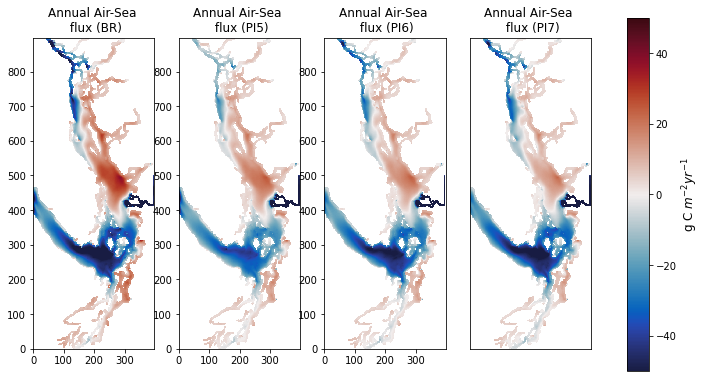

In [35]:
fs = 12
fact = 0.5
tvmin = -50
tvmax = 50

fig, axs = plt.subplots(1,4, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tplt = BR_flx_gC_m2_yr
viz_tools.set_aspect(axs[0])
axs[0].pcolormesh(tplt, cmap=cm.balance, vmin=tvmin, vmax=tvmax)
axs[0].set_title('Annual Air-Sea \n flux (BR)', fontsize = fs)
plt.xticks([])
plt.yticks([])
# cbar = plt.colorbar(mesh)
# cbar.ax.tick_params(labelsize=fs)

tplt = PI5_flx_gC_m2_yr
viz_tools.set_aspect(axs[1])
axs[1].pcolormesh(tplt, cmap=cm.balance, vmin=tvmin, vmax=tvmax)
axs[1].set_title('Annual Air-Sea \n flux (PI5)', fontsize = fs)
plt.xticks([])
plt.yticks([])

tplt = PI6_flx_gC_m2_yr
viz_tools.set_aspect(axs[2])
axs[2].pcolormesh(tplt, cmap=cm.balance, vmin=tvmin, vmax=tvmax)
axs[2].set_title('Annual Air-Sea \n flux (PI6)', fontsize = fs)
plt.xticks([])
plt.yticks([])

tplt = PI7_flx_gC_m2_yr
viz_tools.set_aspect(axs[3])
im = axs[3].pcolormesh(tplt, cmap=cm.balance, vmin=tvmin, vmax=tvmax)
axs[3].set_title('Annual Air-Sea \n flux (PI7)', fontsize = fs)
plt.xticks([])
plt.yticks([])

cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('g C $m^{-2}$$yr^{-1}$', fontsize = 12)
# cbar = plt.colorbar(mesh)
# cbar.ax.tick_params(labelsize=fs)



#### LOAD EVANS OBS. DATASET, CONVERT FROM MMOL/M2/DAY TO G/M2/YR

##### calculating annual mean - assumption that air-sea flux in spring is 0 

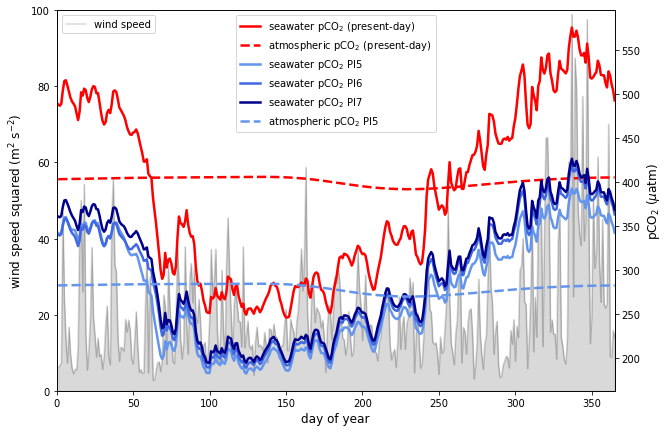

In [38]:
fig, ax = plt.subplots(1,1, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')


lw = 2.5
alph = 0.15
days = np.arange(1,366,1)
#windspeed
ax.plot(days,wind_daily_mean_squared,'-k', alpha = alph, label = 'wind speed')
ax.fill_between(days, np.zeros_like(wind_daily_mean_squared), (wind_daily_mean_squared), \
             color = 'k', alpha = alph )
ax.set_ylim([0,100])
ax.set_xlim([0,365])
ax.set_ylabel('wind speed squared (m$^2$ s$^{-2}$)', fontsize = fs)
axb =ax.twinx()
axb.plot(days,pco2_daily_mean_BR3,'-r', linewidth = lw, label = 'seawater pCO$_2$ (present-day)')
axb.plot(days,atcco2_array,color = 'r', linewidth = lw, linestyle = '--', label = 'atmospheric pCO$_2$ (present-day)' )

axb.plot(days,pco2_daily_mean_PI5, color = 'cornflowerblue', linewidth = lw, linestyle = '-', label = 'seawater pCO$_2$ PI5')
axb.plot(days,pco2_daily_mean_PI6, color = 'royalblue', linewidth = lw, linestyle = '-', label = 'seawater pCO$_2$ PI6')
axb.plot(days,pco2_daily_mean_PI7, color = 'darkblue', linewidth = lw, linestyle = '-', label = 'seawater pCO$_2$ PI7')

axb.plot(days,atcco2_array_PI,color = 'cornflowerblue', linestyle = '--', linewidth = lw, label = 'atmospheric pCO$_2$ PI5' )

axb.legend(loc = 'best')
axb.set_ylabel('pCO$_2#$ ($\mu$atm)', fontsize = fs)
ax.set_xlabel('day of year', fontsize = fs)

# axb.axhline(y=409, color = 'r', linestyle = ':')

axb.set_xlim([0,365])
#ax.text(0.03, 0.03, 'd)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax.legend(loc = 'best')
#ax.grid()
    